In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model

In [2]:
df = pd.read_csv('homeprices.csv')
df

,area,price
0,2600,550000
1,3000,565000
2,3200,610000
3,3600,680000
4,4000,725000


Text(0, 0.5, 'price(US $)')

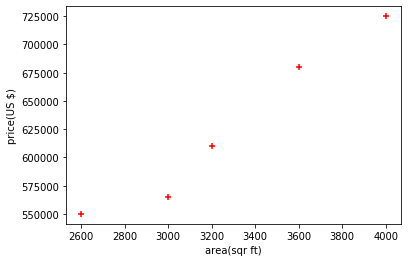

In [5]:
%matplotlib inline
plt.scatter(df.area,df.price,color='red',marker = '+')
plt.xlabel("area(sqr ft)")
plt.ylabel("price(US $)")

In [27]:
area_new = df.drop('price',axis='columns')
area_new

,area
0,2600
1,3000
2,3200
3,3600
4,4000


In [29]:
price_new = df.drop('area',axis='columns')
price_new

,price
0,550000
1,565000
2,610000
3,680000
4,725000


In [32]:
reg = linear_model.LinearRegression()
pred = reg.fit(area_new,price_new)
pred

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [33]:
pred.predict([[3300]])

array([[628715.75342466]])

In [34]:
pred.coef_

array([[135.78767123]])

In [35]:
reg.intercept_

array([180616.43835616])

In [36]:
135.78767123 * 3300 + 180616.43835616

628715.75341516

In [42]:
area_df = pd.read_csv('areas.csv')
area_df

,areas
0,3456
1,2322
2,4500
3,2800
4,3400


In [44]:
p=pred.predict(area_df)
p

array([[649898.63013699],
       [495915.4109589 ],
       [791660.95890411],
       [560821.91780822],
       [642294.52054795]])

In [47]:
area_df['prices'] = p

In [48]:
area_df

,areas,prices
0,3456,649898.630137
1,2322,495915.410959
2,4500,791660.958904
3,2800,560821.917808
4,3400,642294.520548


In [49]:
area_df.to_csv('predictions.csv')